# Recognizing mnist data set using neural network(NN)

In [1]:
from tensorflow import keras
from keras import models
from keras import layers
from keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load the mnist data set

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Explore the data

In [3]:
print(X_train.shape)
print(X_test.shape)   

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Visualize an Image

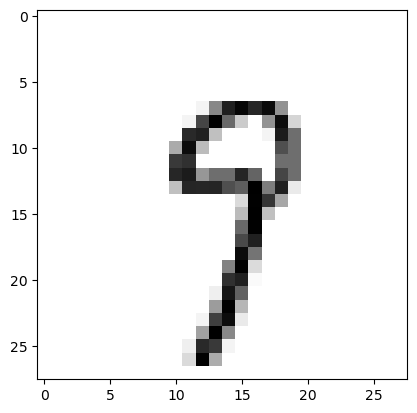

9

In [5]:
IMAGE_INDEX = 1500

digit = X_train[IMAGE_INDEX]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

# label
y_train[IMAGE_INDEX]

In [6]:
print(digit.shape)
digit

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# prepare the data

1- Reshape the images from 28 x 28 to 784 x 1

In [9]:
X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

X_train.shape

(60000, 784)

2- Scale the inputs data from 0-255 -> 0-1

In [10]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

3- prepare the labels -> One Hot Encoding

- convert class vectors to binary class matrices

``Example``

Input 
- [0, 1, 2, 3]

Output:
- [1, 0, 0, 0] -> 0
- [0, 1, 0, 0] -> 1
- [0, 0, 1, 0] -> 2
- [0, 0, 0, 1] -> 3

In [11]:
y_train = to_categorical(y_train)

# Create and Build the Model

In [12]:
# Sequential = stack of layers
# Dense: Fully conected Layer
model = models.Sequential(
    [
        layers.Input(shape = (784,), name = "Input_Layer"),               # Input layer
        layers.Dense(512, name = "First_Layer", activation = "relu"),  # 1. Hidden layer
        layers.Dense(128, name = "Second_Layer", activation = "relu"),  # 2. Hidden layer
        layers.Dense(10, name = "Output_Layer", activation = "softmax")    # Output layer
    ]
)

# Get the Network Summary

Parameters (weights and biases)

784 * 512 + 512

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ First_Layer (Dense)             │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Second_Layer (Dense)            │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

# Compile / Configure the Model 
- Loos Function
- Optimizer
- metrics

In [14]:
model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"]) 

# Training Phase

In [15]:
y_test1 = to_categorical(y_test)

history = model.fit(X_train, y_train, epochs = 10, shuffle = True, validation_data = (X_test, y_test1), verbose = 1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9026 - loss: 0.3244 - val_accuracy: 0.9710 - val_loss: 0.0953
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9741 - loss: 0.0857 - val_accuracy: 0.9731 - val_loss: 0.0915
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9835 - loss: 0.0562 - val_accuracy: 0.9776 - val_loss: 0.0834
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9875 - loss: 0.0461 - val_accuracy: 0.9813 - val_loss: 0.0834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9897 - loss: 0.0359 - val_accuracy: 0.9801 - val_loss: 0.0967
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9924 - loss: 0.0273 - val_accuracy: 0.9832 - val_loss: 0.0835
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9936 - loss: 0.0219 - val_accuracy: 0.9806 - val_loss: 0.0917
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9948 - loss: 0.0175 -

# Visualiz the accuracy

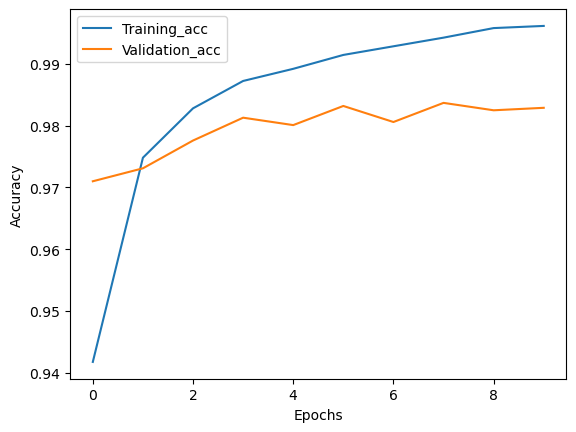

In [16]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Training_acc", "Validation_acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Visualiz the Loss

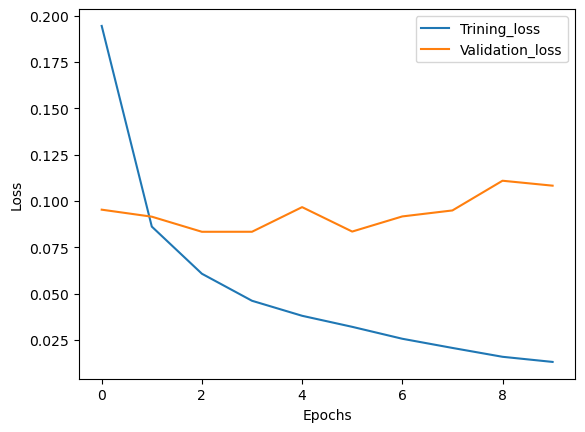

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["Trining_loss", "Validation_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Prediction using the Test Data

In [18]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
for i in predictions:
    print(i)

[1.7788301e-20 1.6740740e-20 1.2324533e-16 4.8009853e-15 1.0309505e-27
 2.4070827e-20 3.6231851e-23 1.0000000e+00 1.0727122e-23 2.3859500e-17]
[2.0127260e-22 3.4892348e-17 1.0000000e+00 4.0500368e-18 8.4389821e-31
 1.2938745e-22 5.2843521e-21 1.9198409e-27 5.1435053e-20 7.6260972e-34]
[3.9500971e-17 1.0000000e+00 2.4549788e-13 3.7123548e-19 2.6071914e-10
 1.3857435e-15 6.4483202e-14 3.6209388e-12 4.7106117e-12 4.9987272e-17]
[1.0000000e+00 1.5301998e-18 5.4110976e-11 1.3450133e-19 3.9673861e-18
 1.4129217e-18 6.3614452e-12 4.0184351e-14 3.0024831e-19 3.9869926e-12]
[8.8637945e-18 6.9940601e-14 1.2289651e-16 1.9876090e-21 1.0000000e+00
 6.5205361e-18 1.1734654e-16 1.4442479e-10 2.4832327e-15 6.8697222e-12]
[5.3851944e-18 1.0000000e+00 9.5735687e-16 3.7076138e-19 1.2023383e-09
 3.0250404e-18 2.0242047e-16 5.8358934e-10 7.3035637e-13 7.8686026e-17]
[2.7033120e-20 2.9488442e-15 2.0238996e-20 9.1819112e-23 1.0000000e+00
 1.9380120e-12 8.9528365e-16 1.0417141e-14 1.5364209e-10 2.9855135e-10]

In [20]:
rounded_predictions = np.argmax(predictions, axis = 1)
for i in rounded_predictions:
    print(i)

7
2
1
0
4
1
4
9
5
9
0
6
9
0
1
5
9
7
3
4
9
6
6
5
4
0
7
4
0
1
3
1
3
4
7
2
7
1
2
1
1
7
4
2
3
5
1
2
4
4
6
3
5
5
6
0
4
1
9
5
7
8
5
3
7
4
6
4
3
0
7
0
2
9
1
7
3
2
9
7
7
6
2
7
8
4
7
3
6
1
3
6
9
3
1
4
1
7
6
9
6
0
5
4
5
9
2
1
9
4
8
7
3
9
7
9
4
4
9
2
5
4
7
6
7
9
0
5
8
5
6
6
5
7
8
1
0
1
6
4
6
7
3
1
7
1
8
2
0
9
9
8
5
5
1
5
6
0
3
4
4
6
5
4
6
5
4
5
1
4
4
7
2
3
2
7
1
8
1
8
1
8
5
0
8
9
2
5
0
1
1
1
0
9
0
3
1
6
4
2
3
6
1
1
1
3
9
5
2
9
4
5
9
3
9
0
3
6
5
5
7
2
2
7
1
2
8
4
1
7
3
3
8
8
7
9
2
2
4
1
5
9
8
7
2
3
0
6
4
2
4
1
9
5
7
7
2
8
2
6
8
5
7
7
9
1
8
1
8
0
3
0
1
9
3
4
1
8
2
1
2
9
7
5
9
2
6
4
1
5
8
2
9
2
0
4
0
0
2
8
4
7
1
2
4
0
2
7
4
3
3
0
0
3
1
9
6
5
2
5
9
7
9
3
0
4
2
0
7
1
1
2
1
5
3
3
9
7
8
6
3
6
1
3
8
1
0
5
1
3
1
5
5
6
1
8
5
1
7
9
4
6
2
2
5
0
6
5
6
3
7
2
0
8
8
5
4
1
1
4
0
3
3
7
6
1
6
2
1
9
2
8
6
1
9
5
2
5
4
4
2
8
3
8
2
4
5
0
3
1
7
7
5
7
9
7
1
9
2
1
4
2
9
2
0
4
9
1
4
8
1
8
4
5
9
8
8
3
7
6
0
0
3
0
2
0
6
9
9
3
3
3
2
3
9
1
2
6
8
0
5
6
6
6
3
8
8
2
7
5
8
9
6
1
8
4
1
2
5
9
1
9
7
5
4
0
8
9
9
1
0
5
2
3
7
2
9
4
0
6


# compare between truth and predicted

In [21]:
IMAGE_INDEX = 1500
print(y_test[IMAGE_INDEX])           # y desired
print(rounded_predictions[IMAGE_INDEX])   # y predicted

7
7


# Confusion Matrix

In [22]:
cm = confusion_matrix(y_test, rounded_predictions)
cm

array([[ 974,    0,    1,    0,    1,    0,    1,    1,    2,    0],
       [   0, 1121,    2,    3,    0,    0,    2,    5,    2,    0],
       [   2,    0, 1010,    7,    2,    0,    3,    3,    4,    1],
       [   0,    0,    3,  994,    0,    3,    0,    3,    2,    5],
       [   1,    2,    0,    0,  959,    0,    5,    3,    1,   11],
       [   2,    0,    0,    8,    0,  874,    3,    0,    4,    1],
       [   2,    2,    0,    1,    4,    3,  946,    0,    0,    0],
       [   1,    0,    4,    2,    1,    0,    0, 1013,    5,    2],
       [   3,    1,    2,    7,    1,    1,    1,    2,  954,    2],
       [   0,    2,    0,    3,    2,    6,    0,    9,    3,  984]],
      dtype=int64)

# Confusion Matrix display

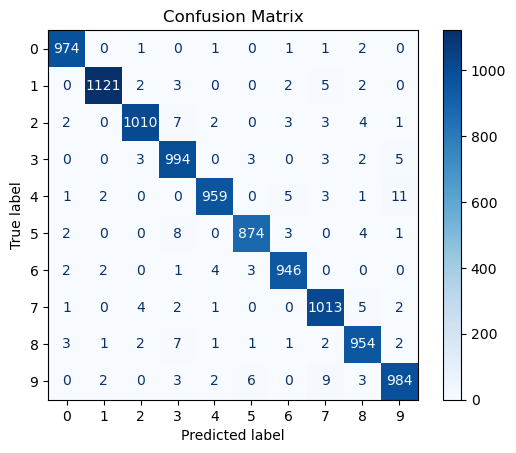

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the Model

In [24]:
eval_loss, eval_acc = model.evaluate(X_test, y_test1)
print(eval_loss)
print(eval_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9796 - loss: 0.1290
0.10823933780193329
0.9829000234603882


# Save the Model

In [22]:
model.save("./models/nn_v1.keras")

# Load the Model

In [23]:
model12 = keras.models.load_model("./models/nn_v1.keras")

In [24]:
model12.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ First_Layer (Dense)             │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Second_Layer (Dense)            │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 937,750 (3.58 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 468,876 (1.79 MB)

# Save the weights

In [25]:
model.save_weights("./models/nn_v1.weights.h5")

In [26]:
# Creat the same Model Structure without cpmpiling or training
# Sequential = stack of layers
# Dense: Fully conected Layer
model_weight = models.Sequential(
    [
        layers.Input(shape = (784,), name = "Input_Layer"),               # Input layer
        layers.Dense(512, name = "First_Layer", activation = "sigmoid"),  # 1. Hidden layer
        layers.Dense(128, name = "Second_Layer", activation = "sigmoid"),  # 2. Hidden layer
        layers.Dense(10, name = "Output_Layer", activation = "sigmoid")    # Output layer
    ]
)

# Load the weights
model_weight.load_weights("./models/nn_v1.weights.h5")

In [27]:
model_weight.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.93322495e-13, 6.45386661e-11, 2.63019717e-10, ...,
        1.78994029e-03, 9.61631599e-13, 1.62317063e-10],
       [2.88137125e-10, 4.46022996e-09, 7.99926147e-02, ...,
        1.99797947e-12, 2.44848386e-09, 2.02537182e-15],
       [1.22898933e-15, 6.37063233e-04, 1.72012890e-10, ...,
        3.98818489e-09, 1.91957547e-10, 1.10094833e-12],
       ...,
       [1.38556300e-16, 5.99534519e-11, 3.94047147e-14, ...,
        9.29794268e-08, 9.90690256e-12, 2.83072499e-08],
       [2.45083988e-12, 1.14751654e-11, 1.63222012e-14, ...,
        1.16378348e-11, 3.14746096e-09, 7.91333077e-14],
       [2.49130855e-10, 9.54681112e-10, 4.99098041e-10, ...,
        1.25850949e-13, 1.27761031e-11, 7.71656176e-12]], dtype=float32)

In [29]:
from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint

In [30]:
my_callback_list = [
    EarlyStopping(min_delta = 0.0001, patience = 7),
    CSVLogger("./logs/training.log"),
    ModelCheckpoint(filepath = "./models/model.{epoch:02d}-{val_loss:.2f}.keras")
]

# Train the Model using Callbacks

In [32]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 128, shuffle = True, validation_split = 0.2, callbacks = my_callback_list)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9999 - loss: 9.1252e-04 - val_accuracy: 0.9985 - val_loss: 0.0078
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 7.3917e-04 - val_accuracy: 0.9984 - val_loss: 0.0081
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 6.4439e-04 - val_accuracy: 0.9985 - val_loss: 0.0079
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 5.8731e-04 - val_accuracy: 0.9986 - val_loss: 0.0078
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 5.5010e-04 - val_accuracy: 0.9983 - val_loss: 0.0078
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 1.0000 - loss: 5.1560e-04 - val_accuracy: 0.9983 - val_loss: 0.0082
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 4.4384e-04 - val_accuracy: 0.9983 - val_loss: 0.0079
